In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tike.tomo
import importlib

In [2]:
for module in [np, tike]:
    print("{} is version {}".format(module.__name__, module.__version__))

numpy is version 1.12.1
tike is version 0.3.2.dev24+g719845d


# Create test data

Make a test data for pytchography reconstruction at one projection angle.

### Define the object

Normalize input uint8 images to the `[0, 1]` and `[0, pi]` ranges.

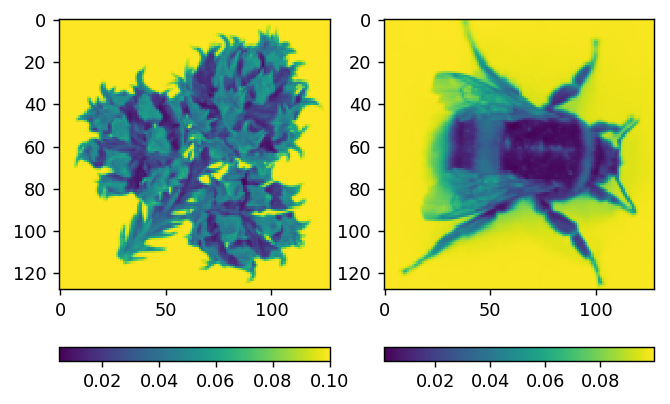

(1, 128, 128)

In [3]:
delta = plt.imread("./Cryptomeria_japonica-0128.tif") / 2550
beta = plt.imread("./Erdhummel_Bombus_terrestris-0128.tif") / 2550
np.min(delta), np.max(beta)

original = np.empty(delta.shape, dtype=complex)
original.real = delta
original.imag = beta
original = np.tile(original, (1, 1, 1))
tike.plot_complex(original[0])
original.shape

### Define trajectory


In [4]:
N_ANGLE = 256
theta = np.linspace(0, np.pi, N_ANGLE, endpoint=False)
theta.shape

(256,)

# Simulate data acquisition

In [5]:
data = tike.tomo.forward(obj=original, theta=theta)
data.shape

INFO:tike.tomo:forward 16,384 element grid
INFO:tike.tomo:forward 32,768 rays


(256, 1, 128)

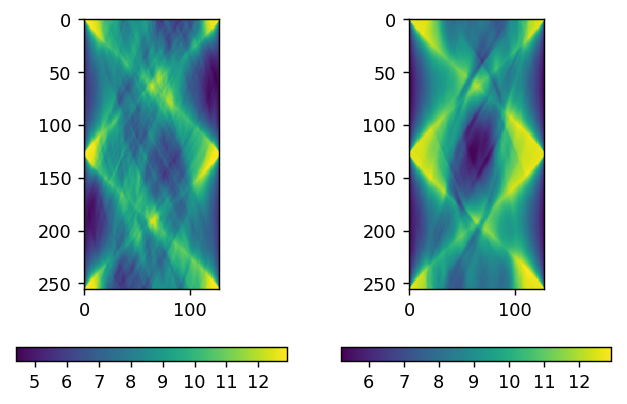

In [6]:
tike.plot_complex(data[:,0,:])

# Reconstruct the data

In [7]:
recon = np.zeros(original.shape, dtype=complex)

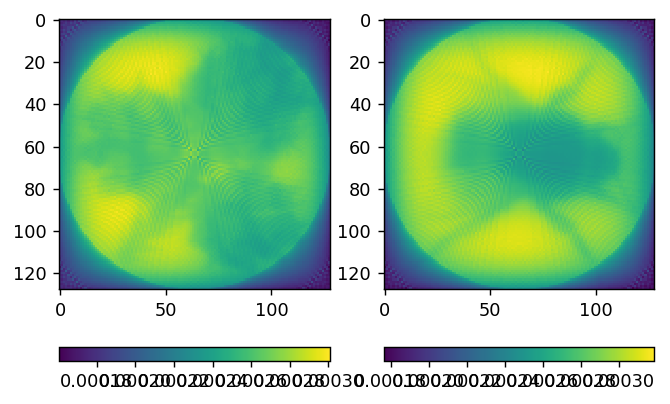

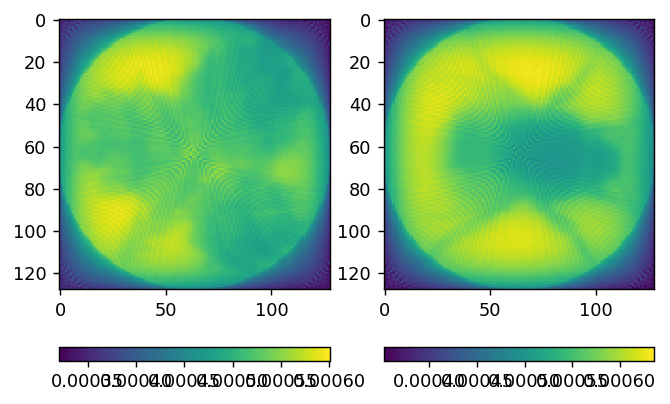

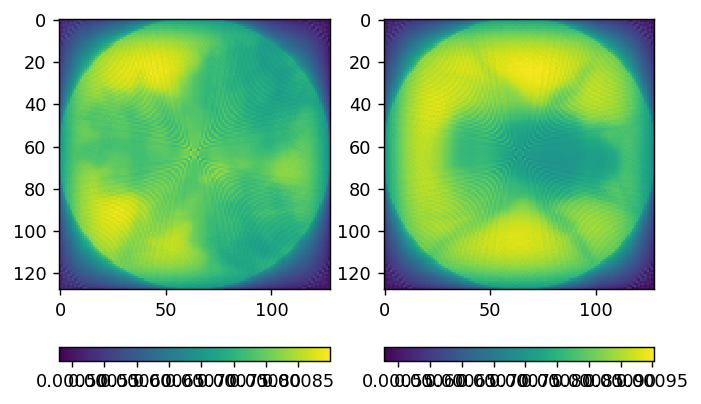

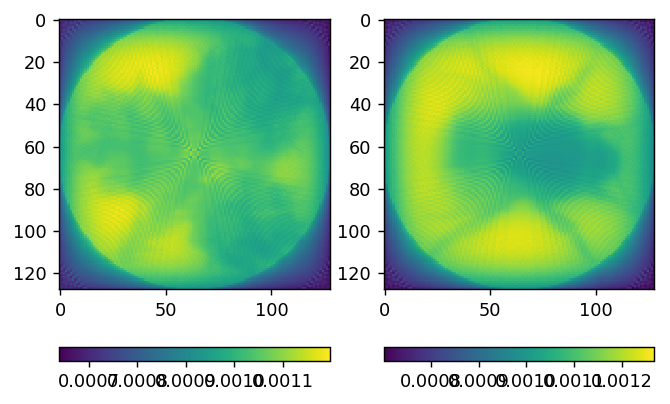

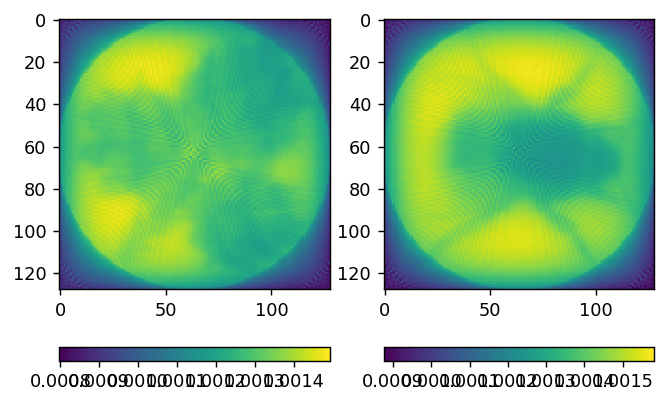

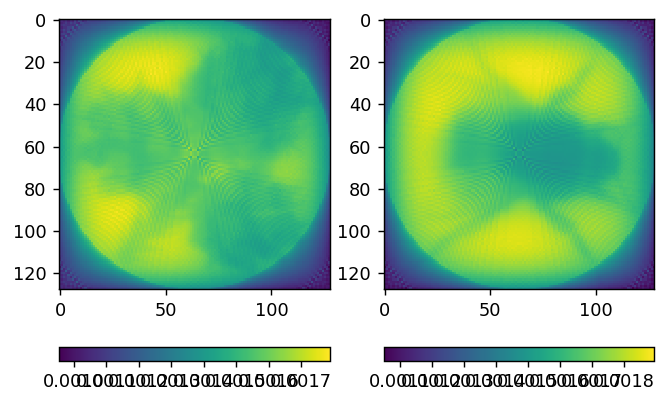

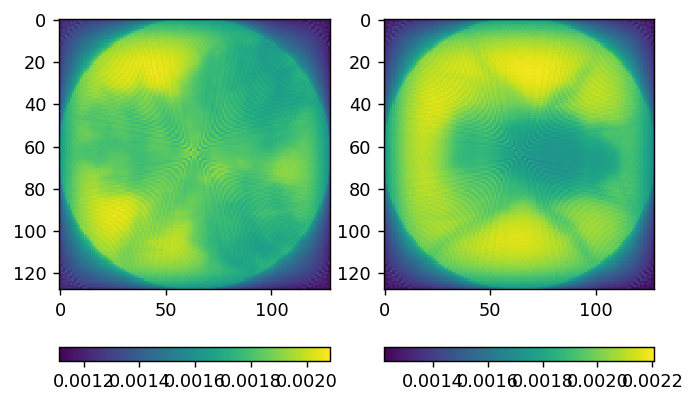

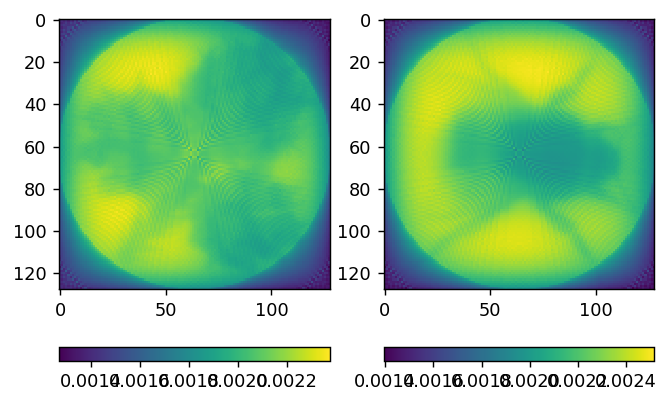

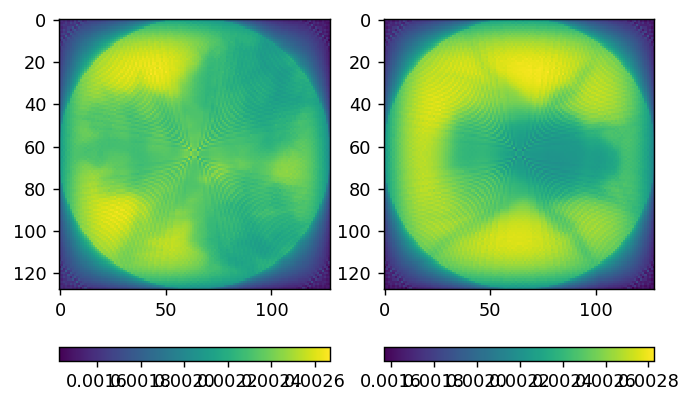

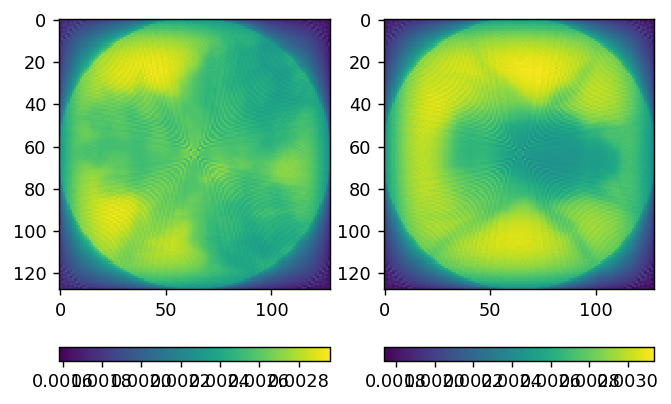

In [8]:
for i in range(10):
    recon = tike.tomo.reconstruct(obj=recon,
                                  theta=theta,
                                  line_integrals=data,
                                  algorithm='grad', reg_par=-1,
                                  niter=1,
                                  )
    tike.plot_complex(recon[0])